In [2]:
import json
import numpy as np
import networkx as nx

In [3]:
with open("../data/pos_traits_definitions.json") as f:
    pos_defs = json.load(f)
with open("../data/neg_traits_definitions.json") as f:
    neg_defs = json.load(f)
with open("../data/neut_traits_definitions.json") as f:
    neut_defs = json.load(f)

In [5]:
G=nx.Graph()
for item in pos_defs:
    for k, v in item.items():
        definitions = nx.Graph()
        definitions.add_node(k)
        for definition in v:    
            definitions.add_edge(k,definition)
        G.add_node(definitions)

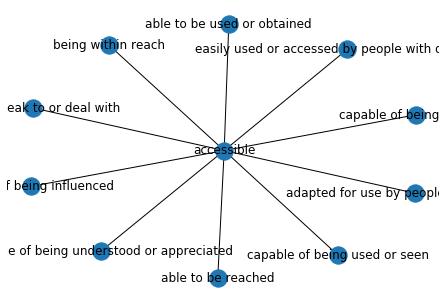

In [6]:
for n in list(G)[1:2]:
    nx.draw(n, with_labels=True)

In [7]:
count = 0

for grp in pos_defs:
    for k, v in grp.items():
        count = count + len(v)
for grp in neut_defs:
    for k, v in grp.items():
        count = count + len(v)
for grp in neg_defs:
    for k, v in grp.items():
        count = count + len(v)

print(count)

5783


In [10]:
def clean_defs(defs):
    """
    :param defs: a list of dicts. each dict's key is a term and each value is a list of definitions.
    """
    for item in defs:
        for k, v in item.items():
            clean_defs = list()
            for definition in v:    
                pass
                # TODO:
                # 1. if definition string contains more than 1 char, include string
                # 2. remove "and" if it appears at end of string
                # 3. remove "," if it appears at start of string
                # 4. if brackets that are not closed are found, delete string, flag out key (term) with erroneous
                # crawling output
                # 5.if last word in string is in ['the', 'a'], delete string
            

In [11]:
def count_nodefs(defs):
    empty_defs = list()
    for item in defs:
        for k, v in item.items():
            if len(v) == 0:
                empty_defs.append(k)
    return empty_defs

empty_defs = count_nodefs(neut_defs)
print(len(empty_defs))
print(empty_defs)
print(len(neut_defs))

30
['chummy', 'amusing', 'circumspect', 'contradictory', 'deceptive', 'droll', 'enigmatic', 'freewheeling', 'glamorous', 'high-spirited', 'guileless', 'irreverent', 'impressionable', 'noncompetitive', 'obedient', 'placid', 'retiring', 'restrained', 'skeptical', 'stylish', 'surprising', 'unambitious', 'unaggressive', 'unchanging', 'unfathomable', 'undemanding', 'unhurried', 'uninhibited', 'unpatriotic', 'unsentimental']
106


In [12]:
with open("../data/mit_ideonomy_traits.json") as f:
    mit_ideonomy_traits = json.load(f)
    
with open("../data/update.txt") as f:
    yihao_traits = f.readlines()

In [13]:
mit_set = set()
for key in mit_ideonomy_traits.keys():
    for trait in mit_ideonomy_traits[key]:
        mit_set.add(trait.lower())

In [14]:
yihao_set = set()
for trait in yihao_traits:
    yihao_set.add(trait.strip().lower())

In [15]:
common_set = mit_set & yihao_set
len(common_set)

164

In [17]:
union_set = mit_set | yihao_set
len(union_set)

1201

In [18]:
# with open('../data/union_of_mit_and_update.txt', 'a') as f:
#     for trait in union_set:
#         f.write(trait+'\n')

In [19]:
import pickle
with open("../data/graph.pickle",'rb') as f:
    trait_graph = pickle.load(f)
type(trait_graph)

In [21]:
len(trait_graph)

728

In [22]:
trait_graph["considerate"]

AtlasView({'inconsiderate': {'weight': -1}, 'thoughtful': {'weight': 1}})

In [23]:
# pull terms and definitions out from the definition files into a 
# more convenient dict format.
full_def_dict = dict()
for item in pos_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions
for item in neg_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions
for item in neut_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions        

In [31]:
len(pos_defs) + len(neut_defs) + len(neg_defs)

611

In [24]:
full_def_dict["considerate"]

['marked by or given to careful',
 'showing kindness toward other people',
 'thinking about the rights and feelings of other people',
 'thoughtful of the rights and feelings of others']

In [25]:
# construct "full" graph by adding definitions into trait_graph.
for term, defs in full_def_dict.items():
    if term in trait_graph:
        for definition in defs:
            trait_graph.add_edge(term, definition, weight=1)  # we regard a definition relation as an entailment relation.

In [36]:
# save dictionary of definitions of traits in the trait_graph.
common_trait_dict = dict()  # common between mit ideonomy set and yihao's trait graph.
for term, defs in full_def_dict.items():
    if len(defs) > 0 and term in trait_graph:
        common_trait_dict[term] = defs

with open("../data/common_traits_dict.json", 'w') as f:
    json.dump(common_trait_dict, f)

In [38]:
with open("../data/common_traits_dict.json", 'r') as f:
    tmp = json.load(f)
print(tmp.keys())
print(len(tmp))

dict_keys(['active', 'adventurous', 'amiable', 'benevolent', 'agreeable', 'calm', 'challenging', 'compassionate', 'clever', 'considerate', 'cheerful', 'confident', 'cooperative', 'courteous', 'cultured', 'creative', 'curious', 'decent', 'dynamic', 'earnest', 'ebullient', 'energetic', 'fair', 'faithful', 'flexible', 'forthright', 'generous', 'gallant', 'friendly', 'genuine', 'gracious', 'honest', 'imaginative', 'humorous', 'honorable', 'intelligent', 'intuitive', 'liberal', 'magnanimous', 'kind', 'logical', 'mature', 'neat', 'open', 'orderly', 'passionate', 'practical', 'precise', 'popular', 'rational', 'reliable', 'responsible', 'sane', 'serious', 'sociable', 'shrewd', 'skillful', 'strong', 'sporting', 'sympathetic', 'tidy', 'wise', 'venturesome', 'witty', 'warm', 'youthful', 'anxious', 'assertive', 'argumentative', 'blunt', 'callous', 'childish', 'careless', 'confused', 'crazy', 'cowardly', 'critical', 'crude', 'difficult', 'dirty', 'cynical', 'desperate', 'dishonest', 'disorderly', '

In [98]:
#nx.draw(trait_graph)

In [99]:
path = input("enter path to save pickled graph:\n")
nx.write_gpickle(trait_graph, path)

enter path to save pickled graph:
 ../data/graph2.pickle


In [100]:
chosen_term = "practical"
print(trait_graph[chosen_term])

{'impractical': {'weight': -1}, 'useful': {'weight': 1}, 'actively engaged in some course of action or occupation': {'weight': 1}, 'an examination in which students have to do or make something to show what they have learned': {'weight': 1}, 'an examination requiring demonstration of some practical skill': {'weight': 1}, 'appropriate or suited for actual use': {'weight': 1}, 'being such in practice or effect': {'weight': 1}, 'capable of being put to use': {'weight': 1}, 'capable of being put to use or account': {'weight': 1}, 'concerned with voluntary action and ethical decisions': {'weight': 1}, 'designed to supplement theoretical training by experience': {'weight': 1}, 'disposed to action as opposed to speculation or abstraction': {'weight': 1}, 'likely to succeed and reasonable to do or use': {'weight': 1}, 'not theoretical or ideal': {'weight': 1}, 'of or relating to real action rather than ideas or thought': {'weight': 1}, 'of, relating to, or manifested in': {'weight': 1}, 'or ac

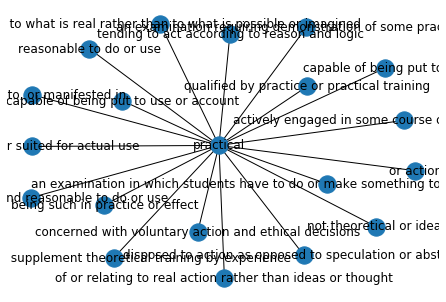

In [103]:
# construct 2 new graphs of two directly connected terms and their definitions,
# and visualise them.
G1 = nx.Graph()
for edge in trait_graph[chosen_term].keys():
    #print(trait_graph[random_term][edge])
    if 'relation' in trait_graph[chosen_term][edge]:
        G1.add_edge(chosen_term, edge, relation='defined as')
nx.draw(G1, with_labels=True)

In [105]:
for edge in trait_graph[chosen_term].keys():
    #print(trait_graph[random_term][edge])
    if 'weight' in trait_graph[chosen_term][edge]:
        term2 = edge
        break
print(term2)
print(trait_graph[chosen_term][term2]['weight'])

impractical
-1


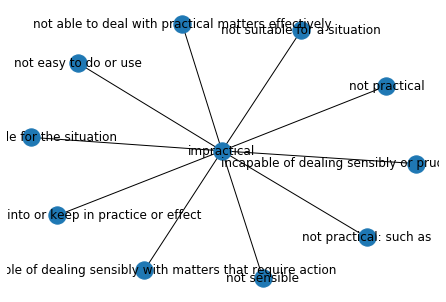

In [106]:
G2 = nx.Graph()
for edge in trait_graph[term2].keys():
    #print(trait_graph[random_term][edge])
    if 'relation' in trait_graph[term2][edge]:
        G2.add_edge(term2, edge, relation='defined as')
nx.draw(G2, with_labels=True)

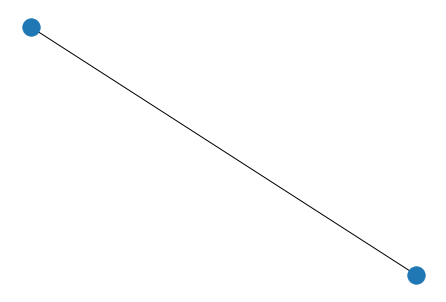

In [107]:
aggregate_graph = nx.Graph()
aggregate_graph.add_edge(G1, G2, weight=trait_graph[chosen_term][term2]['weight'])
nx.draw(aggregate_graph, with_labels=True)